# Анализ рынка заведений общественного питания Москвы

### Введение

Инвесторы решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан или бар. Расположение, меню и цены пока тоже обсуждаются. Заказчики просят провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места.

### Цели и задачи проекта

Цель: Провести исследовательский анализ данных рынка заведений общественного питания Москвы.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить категории заведений представлены в данных;
    - изучить распределение количества заведений по административным районам Москвы;
    - изучить соотношение сетевых и несетевых заведений;
    - изучить количество посадочных мест в заведениях;
    - изучить рейтинг заведений;
    - построить матрицу корреляции рейтинга заведений с разными данными;
    - найти топ-15 популярных сетей в Москве;
    - изучить вариацию среднего чека заведения в зависимости от района Москвы.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа будут использоваться датасеты о заведениях общественного питания Москвы, составленные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:

`rest_info.csv` - содержит информацию о заведениях общественного питания, с таким описанием:
- `id` - уникальный идентификатор заведения;
- `name` - название заведения;
- `address` - адрес заведения;
- `district` - административный район, в котором находится заведение;
- `category` -  категория заведения;
- `hours` - информация о днях и часах работы;
- `rating` - рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` - число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (0 - заведение не является сетевым, 1 - заведение является сетевым);
- `seats` - количество посадочных мест.

`rest_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания, с таким описанием:
- `id` - уникальный идентификатор заведения;
- `price` - категория цен в заведении;
- `avg_bill` - строка, которая хранит среднюю стоимость заказа в виде диапазона;
- `middle_avg_bill` - число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки "Средний счёт":
  - если в строке указан ценовой диапазон из двух значений - в столбеце медиана этих двух значений.
  - если в строке указано одно число - в столбеце это число.
  - если значения нет или оно не начинается с подстроки "Средний счёт" - в столбеце ничего нет;
- `middle_coffee_cup` - число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки "Цена одной чашки капучино":
    - если в строке указан ценовой диапазон из двух значений - в столбеце медиана этих двух значений;
    - если в строке указано одно число - в столбеце это число;
    - если значения нет или оно не начинается с подстроки "Цена одной чашки капучино" - в столбец ничего нет.    

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговый вывод и рекомендации.

---

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_info_df` и `rest_price_df`.

In [1]:
# Библиотека для обработки и анализа данных
import pandas as pd

# Библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотека для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [2]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
path = '...'

rest_info_df = pd.read_csv(path + 'rest_info.csv')
rest_price_df = pd.read_csv(path + 'rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведим общую информацию о датасетах и первые пять строк.

In [3]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информацию о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов указаны в одном стиле.
- Столбцы `id`, `name`, `category`, `address`, `district` и `hours`содержат строковую информацию, здесь тип данных `object` подходит.
- Столбец `rating` содержит информацию о рейтинге, здесь тип `float64` верное решение, однако размеронсть можно оптимизировать.
- В столбеце `chain` хранится информация, которая показывает наличие признака у заведения и содержит значения 1 или 0. Для этих данных также можно использовать тип `bool`. Оставим текущий тип. Размерность этих данных также можно оптимизировать.
- Столбец `seats` - содержит информацию о количестве посадочных мест, тип `float64` здесь связан с наличием пропусков, преобразуем его в тип `Int64`.
- Пропуски содержатся только в столбцах `hours` и `seats`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Далее познакомимся с данными датасета `rest_info.csv` — выведим общую информацию о датасетах и первые пять строк.

In [5]:
# Выводим первые строки датафрейма на экран
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price_df` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов указаны в одном стиле.
- Столбцы `id`, `price` и `avg_bill` содержат строковую информацию, здесь тип данных `object` подходит.
- Столбецы `middle_avg_bill` и `middle_coffee_cup` содержат информацию о средних величинах, здесь тип `float64` верное решение, однако, размерность можно оптимизировать.
- Пропуски содержатся в столбцах `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

**Промежуточный вывод**

Первичное знакомство показывает, что данные содержат пропуски в столбцах: `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`, сами данные соответствуют описанию, названия столбцов указаны в едином стиле и используются корректный типы данных.

---
## 2. Предобработка данных

Объединим данные двух датасетов в один датафрейм - `df`, с которым далее продолжим работу. Данные будем объединять по идентификатору  - `id`. При обединение оставим все данные из `rest_info_df` и к ним добавим данные из `rest_price_df`.

In [7]:
# Объединяем данные в единый датафрейм df
df = rest_info_df.merge(rest_price_df, 
                        on='id', 
                        how='left'
                       )

In [8]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные объединене и информация обо всех заведениях сохранилась.

Подготоим данные к исследовательскому анализу:

- проведём оптимизацию числовых типов данных.

In [9]:
# Оптимизируем тип данных с плавающей точкой в датафрейме
for column in ['rating', 'middle_avg_bill', 'middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column], downcast='float')

In [10]:
# Оптимизируем целочисленный тип данных в датафрейме
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [11]:
# Преобразуем seats к типу int c сохранением пропусков
df['seats'] = df['seats'].astype('Int64')

In [12]:
# Проверим типы данных в датафрейме с помощью атрибута dtypes
df[['rating','seats','middle_avg_bill', 'middle_coffee_cup','chain']].dtypes

rating               float32
seats                  Int64
middle_avg_bill      float32
middle_coffee_cup    float32
chain                   int8
dtype: object

Типы данных были успешно оптимизированы с понижением размерности в числовых данных.

- Изучим пропущенные значения в данных и посчитаем их количество в каждом столбце датафрейма.

In [13]:
# Подсчитываем процент строк с пропусками
missing_df = pd.DataFrame({
    'Количество пропусков': df.isna().sum(),
    'Процент пропусков (%)': round(df.isna().mean() * 100, 1)
})
print("\nАнализ пропущенных значений")
missing_df


Анализ пропущенных значений


,Количество пропусков,Процент пропусков (%)
id,0,0.0
name,0,0.0
category,0,0.0
address,0,0.0
district,0,0.0
hours,536,6.4
rating,0,0.0
chain,0,0.0
seats,3611,43.0
price,5091,60.6


В данных есть пропуски и в некоторых столбцах достаточно большое количество, чтобы их просто удалить. Пропуски могут быть связаны с техническим сбоем или с тем, что данную информацию не заполнили, т.к. информация была взята из общедоступных источников. В столбце `price` пропуски заменим на -  `неизвестно`, в остальных столбцах оставим как есть, т.к. заполнение значительного количество пропусков может исказить результаты исследования.

In [14]:
# Заменяем пропуски в столбце price на 'неизвестно'
df['price']=df['price'].fillna('неизвестно')

Изучим уникальные значения в категориальных данных: район, категория заведения, категория цен и в показателе, определяющем сетевую принадлежность. Проверим встречаются ли среди данных неявные дубликаты, связанные с опечатками или разным способом написания.

In [15]:
# Список столбцов с категориальными данными
category_name = ['district', 'category', 'chain', 'price']

print(f'Уникальные значения в ключевых категориальных данных.\n')
for clm in category_name:
    print(f'Столбец {clm} содержит {df[clm].nunique()} уникальное(ых) значений:\n {df[clm].sort_values().unique()}\n')      

Уникальные значения в ключевых категориальных данных.

Столбец district содержит 9 уникальное(ых) значений:
 ['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Столбец category содержит 8 уникальное(ых) значений:
 ['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Столбец chain содержит 2 уникальное(ых) значений:
 [0 1]

Столбец price содержит 5 уникальное(ых) значений:
 ['высокие' 'выше среднего' 'неизвестно' 'низкие' 'средние']



Опечаток и ошибок не обнаружено.

- Проверим данные на явные и неявные дубликаты. Для оптимизации проверки нормализуем данные в столбцах с названием и адресом заведения, преобразуем их к единому стилю: первый символ строки в верхний регистр (заглавную букву), а все остальные — в нижний регистр.

In [16]:
# Преобразование столбцов к единому стилю 
for column in ['name', 'address']:
    df[column] = df[column].str.capitalize() 

In [17]:
# Проверяем на полные дубликаты
print(f'Количество полных дубликатов: {df.duplicated().sum()} строк.')

Количество полных дубликатов: 0 строк.


Проверим неявные дубликаты.

In [18]:
# Проверяем неявные дубликаты (включаем поля)
with_clm = [['id'], ['name', 'address']]
for i, clm in enumerate(with_clm):
    print(f'{i+1}. Количество неявных дубликатов по {clm}:\n {df.duplicated(clm).sum()} строк.\n')

1. Количество неявных дубликатов по ['id']:
 0 строк.

2. Количество неявных дубликатов по ['name', 'address']:
 4 строк.



Удалим неявные дубликаты.

In [19]:
# Количество строк до удаления
rows_before_drop = len(df)

In [20]:
# Удаляем неявные дубликаты
df = df.drop_duplicates(['name', 'address']).reset_index(drop=True)

print(f'Процент удаленных строк: {round((1 - len(df) / rows_before_drop) * 100, 2)}%')

Процент удаленных строк: 0.05%




Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [21]:
# Записываем в столбец is_24_7 значение True, если заведение работает ежедневно и круглосуточно, в противном случае - False
df['is_24_7'] = (df['hours'].str.contains('ежедневно', case=False) & 
                 df['hours'].str.contains('круглосуточно', case=False))

Проверим результат заполнения столбца `is_24_7`. Посчитаем долю заведений которые работают круглосуточно и ежедневно.

In [22]:
print(f'В представленных данных {df['is_24_7'].mean()*100:.1f}% заведений работают круглосуточно и ежедневно.')

В представленных данных 8.7% заведений работают круглосуточно и ежедневно.


**В результате предобработки данных были выполнены следующие действия:**
- Объединили данные двух датасетов в один датафрейм - `df`. При обединение оставили все данные из `rest_info_df` и к ним добавим данные из `rest_price_df`.
- Проанализировали данные на пропуски. Столбцы `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` содержат значительное количество пропусков. Они могут быть связаны с техническим сбоем или с тем, что данную информацию не заполнили, т.к. информация была взята из общедоступных источников. В столбце `price` пропуски заменим на - `неизвестно`, в остальных оставили как есть, т.к. заполнение значительного количество пропусков может исказить результаты исследования.
- Добавили столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно - значение `True`, в противном случае -`False`.
- Данные проверили на явные и неявные дубликаты. Было удалено 4 строки или 0.05% данных.

---

## 3. Исследовательский анализ данных


1. Проанализируем какие категории заведений общественного питания представленые в данных. Исследуем количество объектов общественного питания по каждой категории.

Создадим функцию, которая группирует данные датафрейма `df` по заданному столбцу и подсчитывает количетво и процент заведений в каждой группе.

In [23]:
def tab_gr(column):
    '''
    Функция возврщает таблицу из датафрейма df с сгруппированными данными по column 
    и подсчитывает количетво и процент заведений в каждой группе. 
    Параметры:
    column - str, название столбца, по которому будет произведена группировка.
    '''
    category_df = pd.DataFrame({
            'Количество заведений': df[column].value_counts(),
            'Процент заведений (%)': round(df[column].value_counts() / df[column].value_counts().sum() * 100, 1)})
    return category_df

Посмотрим на категории общественного питания и количество заведений в каждой из них. Для визуального анализа такого распределения можно использовать столбчатую диаграмму. 

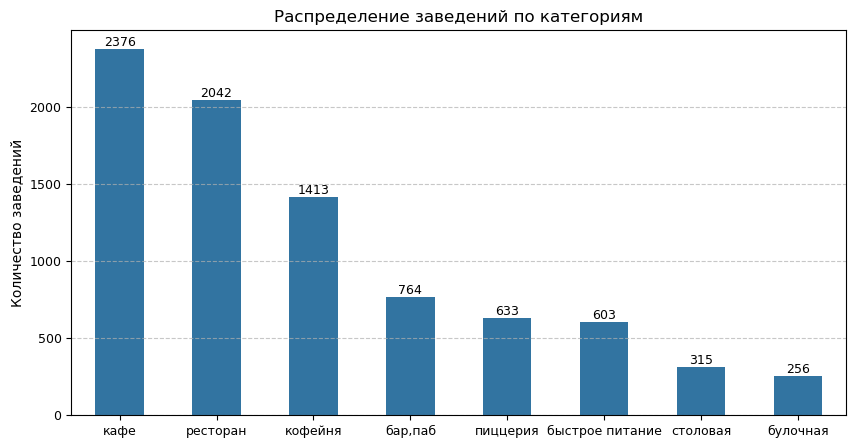


Распределение заведений по категориям


,Количество заведений,Процент заведений (%)
category,,
кафе,2376,28.3
ресторан,2042,24.3
кофейня,1413,16.8
"бар,паб",764,9.1
пиццерия,633,7.5
быстрое питание,603,7.2
столовая,315,3.7
булочная,256,3.0


In [59]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

graf = df['category'].value_counts()

# Строим столбчатую диаграмму
sns.barplot(graf,
            width=0.5
           )

# Настраиваем оформление графика
plt.title('Распределение заведений по категориям')
plt.xlabel('')
plt.ylabel('Количество заведений')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписи значений над столбцами
for i, v in enumerate(graf.values):
    plt.text(graf.index[i], v, str(v), ha='center', va='bottom', fontsize=9)

# Выводим график
plt.show()

print('\nРаспределение заведений по категориям')
tab_gr('category')

Больше всего заведений категории: кафе, ресторан и кофейня, на них приходится 69.4% от всех заведений. Меньше всего булочных и столовых на них приходится всего 6.7% от всех заведений.

2. Проанализируем какие административные округа Москвы присутствуют в данных. Исследуем распределение количества заведений по административным округам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

Посмотрим как заведения общественного питания распределены между административными округами Москвы. Для визуального анализа такого распределения можно использовать столбчатые диаграммы.

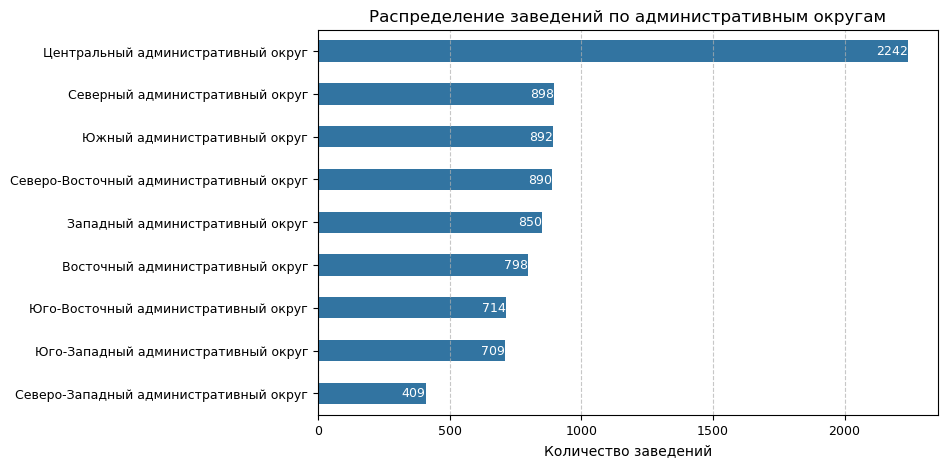


Распределение заведений по административным округам


,Количество заведений,Процент заведений (%)
district,,
Центральный административный округ,2242,26.7
Северный административный округ,898,10.7
Южный административный округ,892,10.6
Северо-Восточный административный округ,890,10.6
Западный административный округ,850,10.1
Восточный административный округ,798,9.5
Юго-Восточный административный округ,714,8.5
Юго-Западный административный округ,709,8.4
Северо-Западный административный округ,409,4.9


In [55]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(8, 5))

# Рассчитываем данные для графика
gr_dist = df['district'].value_counts().reset_index()

# Построим график столбчатой диаграммы
sns.barplot(gr_dist, 
            y='district', 
            x='count', 
            width=0.5,
           )

# Настраиваем оформление графика
plt.title('Распределение заведений по административным округам')
plt.xlabel('Количество заведений')
plt.ylabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Подписи значений у столбцов
for i, v in enumerate(gr_dist['count'].values):
    plt.text(v, gr_dist['count'].index[i], str(v), ha='right', va='center', fontsize=9, color='white')

# Выводим график
plt.show()

print('\nРаспределение заведений по административным округам')
tab_gr('district')

Больше всего заведений в Центральном административном округе - 2242 (26.7% от всех заведений), меньше всего в Северо-Западном административном округе - 409 (4.9%), в остальных от 700 до 900.

Теперь посмотрим как распределены заведения общественного питания по категориям в Центральном административном округе.

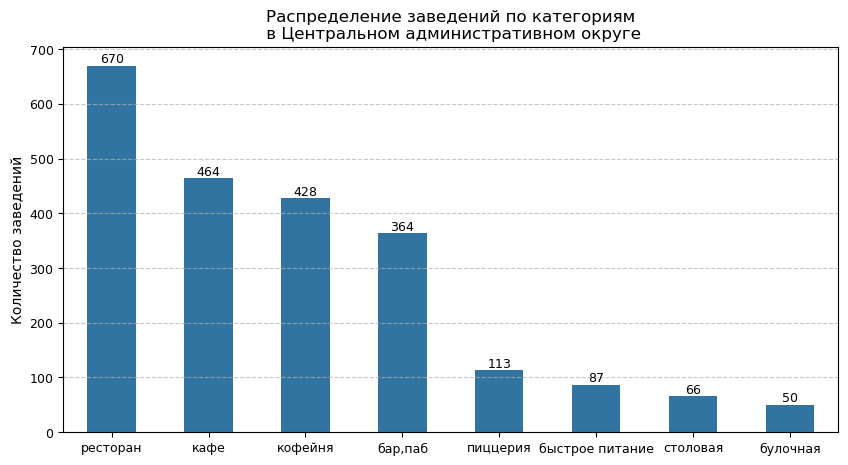


Распределение заведений по категориям


,Количество заведений,Процент заведений (%)
category,,
ресторан,670,29.9
кафе,464,20.7
кофейня,428,19.1
"бар,паб",364,16.2
пиццерия,113,5.0
быстрое питание,87,3.9
столовая,66,2.9
булочная,50,2.2


In [56]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Рассчитываем данные для графика
gr_tsao = df[df['district']=='Центральный административный округ']['category'].value_counts()

# Строим столбчатую диаграмму
sns.barplot(gr_tsao,
            width=0.5
           )

# Настраиваем оформление графика
plt.title('Распределение заведений по категориям\n в Центральном административном округе')
plt.xlabel('')
plt.ylabel('Количество заведений')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписи значений над столбцами
for i, v in enumerate(gr_tsao.values):
    plt.text(gr_tsao.index[i], v, str(v), ha='center', va='bottom', fontsize=9)

# Выводим график
plt.show()

# Количество и процент заведений в ЦАО по каждой категории заведений
print('\nРаспределение заведений по категориям')
gr_tsao_df = pd.DataFrame({
            'Количество заведений': gr_tsao,
            'Процент заведений (%)': round(gr_tsao / gr_tsao.sum() * 100, 1)})

gr_tsao_df

В центральном административном округе больше всего ресторанов, кафе и кофейн на них приходится - 69.7% от всех заведений в ЦАО, меньше всего столовых и булочных.

3. Проанализируем соотношение сетевых и не сетевых заведений в целом по всем данным и в разрезе категории заведения и выясним:
    - каких заведений больше - сетевых или не сетевых,
    - какие категории заведений чаще являются сетевыми.

Посмотрим соотношение сетевых и не сетевых заведений. Построим круговую диаграмму.

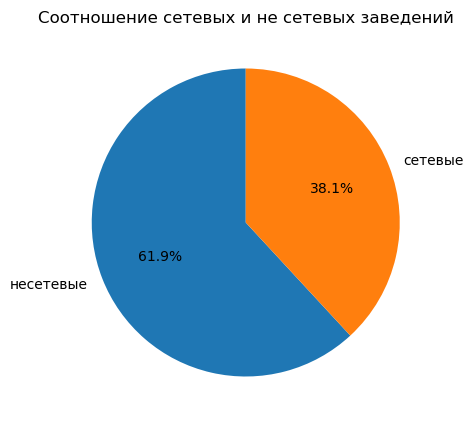


Соотношение сетевых и не сетевых заведений


,Количество заведений,Процент заведений (%)
chain,,
0,5199,61.9
1,3203,38.1


In [27]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(5, 5))

# Рассчитываем данные для графика
gr_chain = df['chain'].value_counts() / df['chain'].value_counts().sum()

# Строим круговую диаграмму
gr_chain.plot(kind='pie',
              startangle=90,
              label="",
              labels=['несетевые', 'сетевые'],
              autopct='%1.1f%%'
             )

# Настраиваем оформление графика
plt.title('Соотношение сетевых и не сетевых заведений')

# Выводим график
plt.show()

print('\nСоотношение сетевых и не сетевых заведений')
tab_gr('chain')

Несетевых заведений оказалось больше, чем сетевых (62% против 38%). Далее посмотрим какие категории заведений чаще бывают сетевыми.

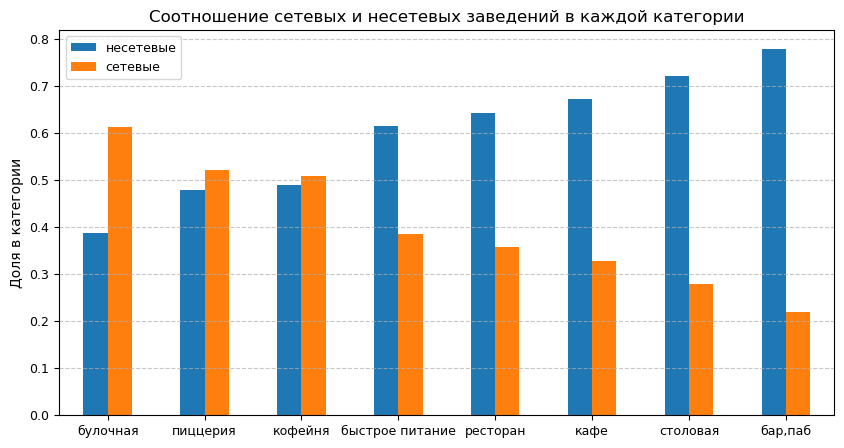


Соотношение сетевых и несетевых заведений в каждой категории


chain,Кол-во несетевых,Кол-во сетевых,Доля несетевых,Доля сетевых
category,,,,
булочная,99,157,0.387,0.613
пиццерия,303,330,0.479,0.521
кофейня,693,720,0.490,0.510
быстрое питание,371,232,0.615,0.385
ресторан,1313,729,0.643,0.357
кафе,1597,779,0.672,0.328
столовая,227,88,0.721,0.279
"бар,паб",596,168,0.780,0.220


In [28]:
# Рассчитываем данные для графика
share_net = df.groupby('category')['chain'].value_counts(normalize=True).unstack().sort_values(by=0, ascending=True)

# Строим толбчатую диаграмму
share_net.plot(kind='bar',
               rot=0,
               figsize=(10, 5)
              )

# Настраиваем оформление графика
plt.title('Соотношение сетевых и несетевых заведений в каждой категории')   
plt.xlabel('')
plt.ylabel('Доля в категории')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(labels=['несетевые', 'сетевые'], title='', fontsize=9)
         
# Выводим график
plt.show()

# Расчет количества заведений в каждой категории
count_catering = df.groupby('category')['chain'].value_counts().unstack()

print('\nСоотношение сетевых и несетевых заведений в каждой категории')
pd.concat([count_catering.rename(columns={0: 'Кол-во несетевых', 
                                          1: 'Кол-во сетевых'}), 
           round(share_net, 3).rename(columns={0: 'Доля несетевых', 
                                               1: 'Доля сетевых'})], 
          axis=1).sort_values(by='Доля сетевых', ascending=False)

Булочные, пиццерии и кофейни чаще являются сетевыми заведениями. Большая доля несетевых заведений в категориях: бары, столовые, кафе и рестораны.

4. Проанализируем количество посадочных мест в заведениях. Проверим встречаются ли в данных аномальные значения или выбросы. Найдем для каждой категории наиболее типичное количество посадочных мест.

Выведем статистические показатели по столбцу `seats` при помощи метода `describe()`:

In [29]:
# Изучаем статистические показатели столбца seats
df['seats'].describe()

count        4792.0
mean     108.361436
std       122.84113
min             0.0
25%            40.0
50%            75.0
75%           140.0
max          1288.0
Name: seats, dtype: Float64

В данных присутствуют аномалии: максимальное значение 1288, что скорее всего является ошибкой, минимальное - 0, возможно. Среднее значение значительно выше медианы - распределение скошено вправо. Значение стандартного отклонения - 122.8, при среднем значении - 108.4, указывает на то, что данные могут иметь широкий разброс. Разница между минимальным и максимальным значениями это подтверждает. Половина всех заведений имеет количество посадочных мест не более 75.

Построим гистограмму распределения количества посадочных мест в заведениях:

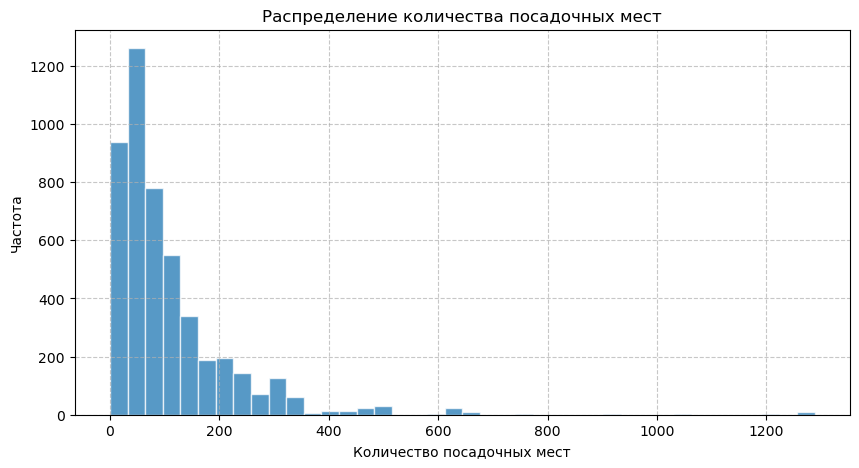

In [30]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим гистограмму
df['seats'].plot(kind='hist',
                 bins=40,
                 alpha=0.75,
                 edgecolor='white',
                 rot=0
                )

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid(linestyle='--', alpha=0.7)

# Выводим график
plt.show()

На гистограмме видно, что диаграмма вытянута вправо, заведения с пасадочными местами более 400 встречаются редко. Больше всего заведений с количеством посадочных мест до 120. Построим диаграмму размаха:

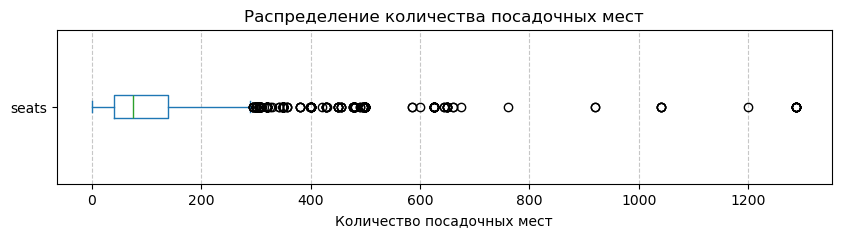

In [31]:
# Рассчитываем данные для графика
plt.figure(figsize=(10, 2))

# Строим диаграмму размаха
df['seats'].plot(kind='box',
                 vert=False
                )

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

На диаграмме видны аномалии. Есть небольшое количество заведений с количеством мест более 700 и группа заведений с количеством мест от 500 до 700. Можем предположить, что заведения с посадочными местами 500-700 действительно могут быть в Москве. Заведения с колиеством мест более 700 скорее всего являются выбросами. Оценим их количество и долю:

In [32]:
# Количество заведений с посадочными местами более 700
more_700_seats = len(df[df['seats']>700])

print('Заведения, содержащие более 700 посадочных мест:')
print(f' - количество заведений: {more_700_seats}')
print(f' - процент заведений: {(more_700_seats / len(df['seats']) * 100):.1f}%')

Заведения, содержащие более 700 посадочных мест:
 - количество заведений: 19
 - процент заведений: 0.2%


Учитывая большую ассиметрию, для определения наиболее типичного количества посадочных мест по всем категориям заведений будем использовать медианное значение.

In [33]:
print(f'Типичное количество посадочных мест по всем категориям заведений: {df['seats'].median():.0f}')

Типичное количество посадочных мест по всем категориям заведений: 75


Далее проанализируем количество посадочных мест по каждой категории заведения. Построим диаграмму размаха по каждой категории:

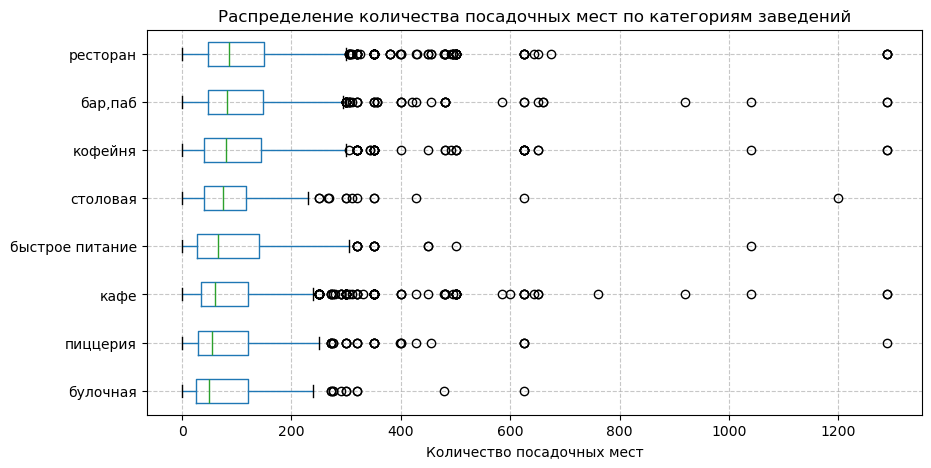

In [34]:
# Рассчитываем данные для графика
plt.figure(figsize=(10, 5))

# Рассчитываем данные для графика
gr_cat_seat = df.groupby(['id', 'category'])['seats'].mean().unstack()

# Расчет медианы по каждому столбцу
sort_name = gr_cat_seat.median().sort_values().index

# Сортируем столбцы по медианному значению
gr_cat_seat = gr_cat_seat.loc[:, sort_name]

# Строим диаграмму размаха
gr_cat_seat.boxplot(vert=False)

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест по категориям заведений')
plt.xlabel('Количество посадочных мест')
plt.grid(linestyle='--', alpha=0.7)

# Выводим график
plt.show()

Здесь также видим ассиметрию по всем категориям заведений, распределения по всем категориям скошены вправо. Категории с количеством посадочных мест более 700 (ранее мы предположили, что это могут быть выбросы) присутствуют во всех категорих кроме булочных. В категории булочные большое количество посадочных мест также вызывает вопрос, скорее всего это ошибка. Для определения наиболее типичного количества мест будем использовать медиану. 

In [35]:
print('Типичное количество посадочных мест в каждой категории:')
print(round(df.groupby('category')['seats'].median())
      .astype(int)
      .sort_values(ascending=False)
      .to_string()
     )

Типичное количество посадочных мест в каждой категории:
category
ресторан           86
бар,паб            82
кофейня            80
столовая           76
быстрое питание    65
кафе               60
пиццерия           55
булочная           50


У ресторанов оказалось самое высокое количество посадочных мест - 86, наименьшее количество у булочных - 50 мест. Для булочных это  слишком высокая цифра и вызывает сомнение в ее корректности.

5. Проанализируем и сравним усреднённые рейтинги для разных типов заведений. Построим столбчатую диаграмму со средним рейтингом по каждой категории заведения.

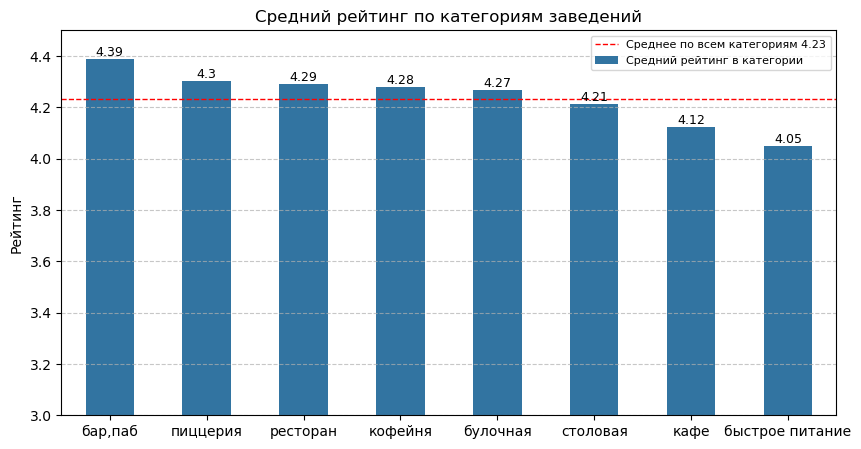

Рейтинг по категориям заведений


,мин,макс,средний
category,,,
"бар,паб",1.1,5.0,4.387696
пиццерия,1.0,5.0,4.301264
ресторан,1.0,5.0,4.290401
кофейня,1.4,5.0,4.277282
булочная,1.3,5.0,4.268359
столовая,1.0,5.0,4.211429
кафе,1.0,5.0,4.124284
быстрое питание,1.1,5.0,4.050249


In [36]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Строим столбчатую диаграмму
gr_rating_cat = df.groupby('category')['rating'].mean().sort_values(ascending=False)
sns.barplot(gr_rating_cat,
            width=0.5,
            label='Средний рейтинг в категории'
           )

# Рассчитываем ср. значение по всем данным
total_avg_rating = df['rating'].mean()

# Наносим на график линию со ср. значением по всем данным
plt.axhline(total_avg_rating, 
            color='red',
            linestyle='--', 
            linewidth=1,
            label=f'Среднее по всем категориям {str(round(total_avg_rating, 2))}'
           )

# Настраиваем оформление графика
plt.title('Средний рейтинг по категориям заведений')
plt.xlabel('')
plt.ylabel('Рейтинг')
plt.legend(fontsize=8)
plt.ylim(3, 4.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписи значений над столбцами
for i, v in enumerate(gr_rating_cat.values):
    plt.text(gr_rating_cat.index[i], v, str(round(v, 2)), ha='center', va='bottom', fontsize=9)

# Выводим график
plt.show()

print('Рейтинг по категориям заведений')
df.groupby('category').agg(мин=('rating', 'min'),
                           макс=('rating', 'max'),
                           средний=('rating', 'mean')
                          ).sort_values(by='средний', ascending=False)

Средний рейтинг изменяется незначительно от категории заведения: от 4.05 до 4.39.

6. Проанализируем с какими данными рейтинг заведения показывает самую сильную корреляцию.

Посмотрим связь между рейтингом и: 
 - категорией заведения,
 - административным округом,
 - статусом сетевого заведения,
 - количеством мест,
 - ценовой категорией,
 - признаком, является ли заведения круглосуточным.

Вычислим корреляционную матрицу и визуализируем результат с помощью тепловой карты.

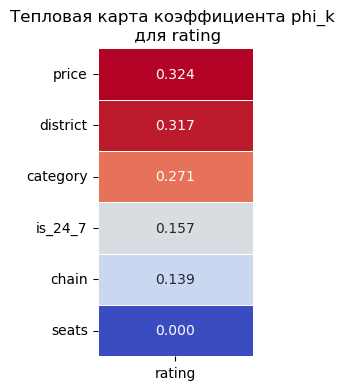

In [37]:
# Вычисляем корреляционную матрицу с использованием phi_k
cor_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix(interval_cols='auto')

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(2, 4))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = cor_matrix.loc[cor_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

# Строим тепловую карту
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False
           )

# Настраиваем оформление графика
plt.title('Тепловая карта коэффициента phi_k \n для rating')

# Выводим график
plt.show()

Наибольшая корреляция рейтинга наблюдается с ценовой категорией (0.324), административным районом (0.317) и категорией заведения (0.271). Для остальных признаков коэффициент корреляции снижается с 0.157 до 0.

phi_k сообщает только о наличии связи между данными. На сам характер связи коэффициент phi_k не указывает. Посмотрим как изменяется рейтинг в зависимости от ценовой категории. 

Визуализируем изменение среднего рейтинга с помощью столбчатой диаграммы.

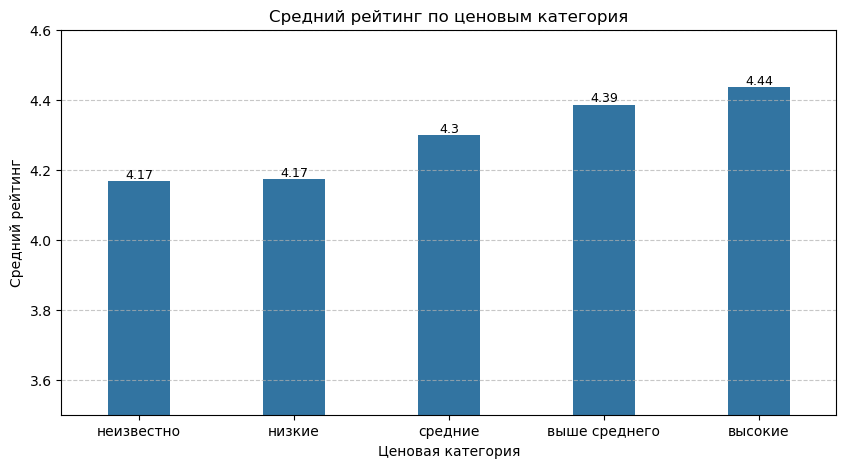

In [38]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Рассчитываем данные для графика
gr_price = df.groupby('price')['rating'].mean().sort_values()

# Построим график столбчатой диаграммы
sns.barplot(data=gr_price, 
            width=0.4
           )

# Настраиваем оформление графика
plt.title('Средний рейтинг по ценовым категория')   
plt.xlabel('Ценовая категория')
plt.ylabel('Средний рейтинг')
plt.ylim(3.5, 4.6)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Подписи значений над столбцами
for i, v in enumerate(gr_price.values):
    plt.text(gr_price.index[i], v, str(round(v, 2)), ha='center', va='bottom', fontsize=9)

# Выводим график
plt.show()

При изменении ценовой категории прослеживается незначительное изменение рейтинга от 4.17 до 4.44, с увеличением ценовой категории средний рейтинг растет.

7. Найдем топ-15 популярных сетевых заведений в Москве. Под популярностью будем понимать количество заведений сети в регионе. Посчитаем для них значение среднего рейтинга.

Подготовим основную таблицу с данными. Сгруппируем сетевые заведения по названию и категории, в столбцы поставим количество заведений и средний рейтинг. Отсортируем данные таблицы по убыванию количества заведений и оставим первые 15. Назовем таблицу - `top_15`.

In [39]:
top_15 = (df[df['chain']==1]
          .groupby(['name', 'category'])[['id', 'rating']]
          .agg({'id': 'count', 'rating': 'mean'})
          .sort_values(by='id', ascending=False)
          .head(15)
         )

Переведем значения `category` из индекса в столбец, в индексе останется только название организации:

In [40]:
top_15.reset_index(level=1, drop=False, inplace=True, col_level=0, col_fill='')

Поменяем название у колонки `id` на `count`.

In [41]:
top_15 = top_15.rename(columns={'id': 'count'})

Выведем общую таблицу топ-15 сетевых заведений, с информацией о категории заведения и среднем рейтинге:

In [42]:
print('Топ-15 сетевых заведений')
display(top_15)

Топ-15 сетевых заведений


,category,count,rating
name,,,
Шоколадница,кофейня,119,4.178151
Домино'с пицца,пиццерия,76,4.169737
Додо пицца,пиццерия,74,4.286487
One price coffee,кофейня,71,4.064789
Яндекс лавка,ресторан,69,3.872464
Cofix,кофейня,65,4.075385
Prime,ресторан,49,4.114285
Кофепорт,кофейня,42,4.147619
Кулинарная лавка братьев караваевых,кафе,39,4.394872


Визуализируем топ-15 популярных сетевых заведений с помощью столбчатой диаграммы:

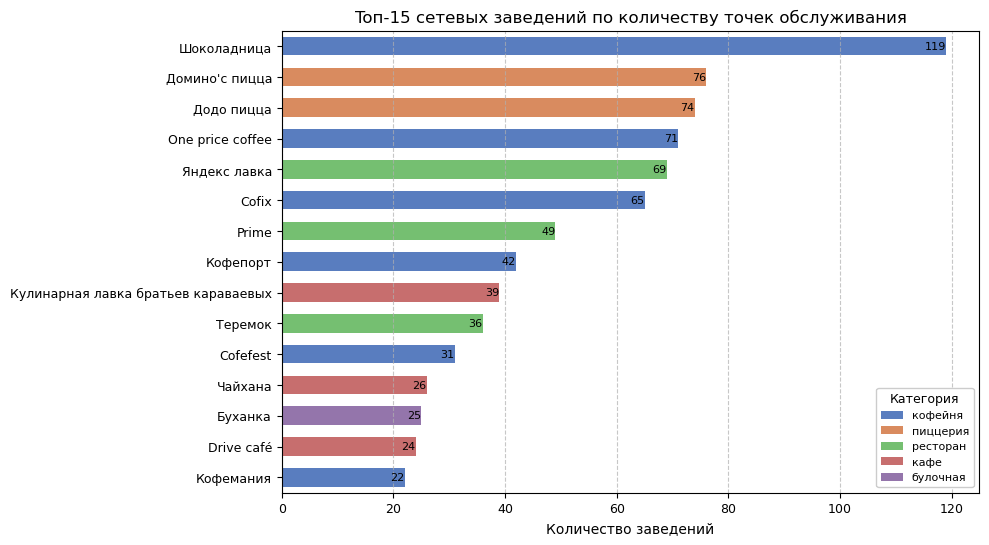

In [43]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(9, 6))

# Строим столбчатую диаграмму
sns.barplot(data=top_15, 
            y='name', 
            x='count', 
            hue='category', 
            width=0.6,
            palette='muted'
           )

# Настраиваем оформление графика
plt.title('Toп-15 сетевых заведений по количеству точек обслуживания')   
plt.xlabel('Количество заведений')
plt.ylabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Категория', fontsize=8, title_fontsize=9, framealpha=1)

# Подписи значений у столбцов
for i, v in enumerate(top_15['count'].values):
    #ratig=round(top_15.loc[top_15['count'].index[i], 'rating'], 1)
    plt.text(v, top_15['count'].index[i], str(v), ha='right', va='center', fontsize=8)

# Выводим график
plt.show()

На первом месте с большим отрывом "Шоколадница" у нее 119 заведений, на втором "Домино'с пицца" - 76 и на третем "Додо пицца" - 74, далее количество заведений снижается до 22 у "Кофемания". В топ-15 на верхних строчках кофейни и пицерии.

Далее посмотрим на средний рейтинг у этих заведений.

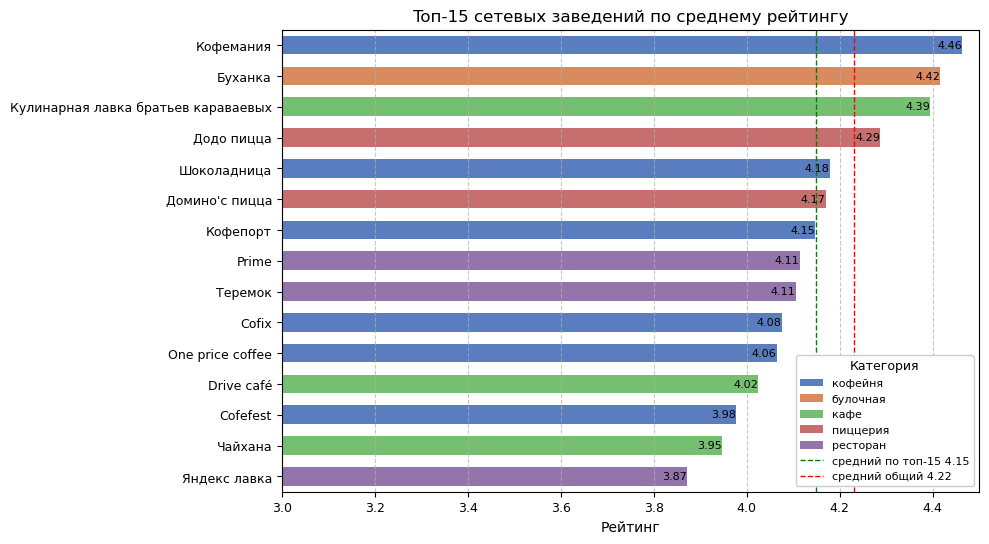

In [60]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(9, 6))

# Рассчитываем данные для графика
top_rating = top_15.sort_values(by='rating', ascending=False)

# Строим столбчатую диаграмму
sns.barplot(data=top_rating, 
            y='name', 
            x='rating', 
            hue='category', 
            width=0.6,
            palette='muted'
           )

# Рассчитываем среднее значение по топ-15
top_avg_rating = top_rating['rating'].mean()

# Наносим на график линию со средним по топ-15
plt.axvline(top_avg_rating, 
            color='green',
            linestyle='--', 
            linewidth=1,
            label=f'средний по топ-15 {str(round(top_avg_rating, 2))}'
           )

# Рассчитываем общее среднее значение
total_avg_rating_chain = df[df['chain']==1]['rating'].mean()

# Наносим на график линию со средним по всем заведениям
plt.axvline(total_avg_rating, 
            color='red',
            linestyle='--', 
            linewidth=1,
            label=f'средний общий {str(round(total_avg_rating_chain, 2))}'
           )

# Настраиваем оформление графика
plt.title('Toп-15 сетевых заведений по среднему рейтингу')   
plt.xlabel('Рейтинг')
plt.ylabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Категория', fontsize=8, title_fontsize=9, framealpha=1)
plt.xlim(3, 4.5)

# Подписи значений у столбцов
for i, v in enumerate(top_rating['rating'].values):
    plt.text(v, top_rating['rating'].index[i], str(round(v, 2)), ha='right', va='center', fontsize=8)

# Выводим график
plt.show()

Самый высокий рейтинг 4.46 у "Кофемания" она замыкала топ-15 по количеству заведений, у "Шоколадница" - 4.18 и она на пятом месте. Самый низкий рейтинг оказался у "Яндекс лавка" - 3.87. Также необходимо отметить, что средний рейтинг в топ-15 составляет 4.15 и это ниже общего среднего рейтинга по всем сетевым заведениям 4.22

Посмотрим каких категорий больше всего в топ-15.

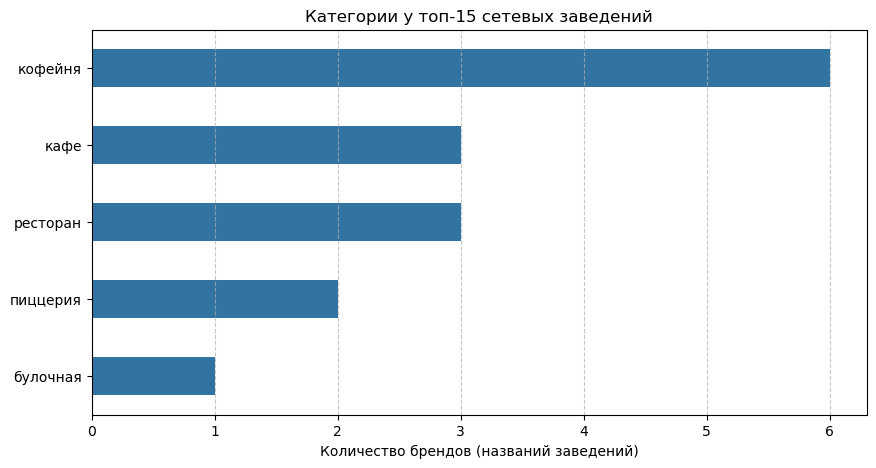

In [45]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(10, 5))

# Рассчитываем данные для графика
top_categ = top_15.groupby('category')['category'].value_counts().sort_values(ascending=False).reset_index()

# Строим столбчатую диаграмму
sns.barplot(top_categ, 
            y='category', 
            x='count', 
            width=0.5
           )

# Настраиваем оформление графика
plt.title('Категории у тoп-15 сетевых заведений')   
plt.xlabel('Количество брендов (названий заведений)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

Больше всего оказалось кофейн, в этой категории работают 6 брендов из топ-15 по популярности, меньше всего булочных - 1 бренд.

8. Проанализируем вариацию среднего чека заведения в зависимости от округа Москвы.

Преобразуем данные в таблицу таким образом: в строках оставим `id` в столбцы перенесем названия округов из `district`, значениями будут данные из `middle_avg_bill` - средний чек и выведем основную статистическую информацию при помощи метода `describe()`:

In [46]:
df.groupby(['id', 'district'])['middle_avg_bill'].mean().unstack().describe()

district,Восточный административный округ,Западный административный округ,Северный административный округ,Северо-Восточный административный округ,Северо-Западный административный округ,Центральный административный округ,Юго-Восточный административный округ,Юго-Западный административный округ,Южный административный округ
count,260.000000,306.000000,322.000000,301.000000,157.000000,1060.000000,194.000000,235.000000,314.000000
mean,820.626953,1053.225464,927.959656,716.611267,822.222900,1191.057495,654.097961,792.561707,834.398071
std,850.903320,779.008362,912.609009,591.232117,595.055176,920.015442,566.825562,559.173035,2008.638062
min,50.000000,50.000000,130.000000,50.000000,120.000000,0.000000,30.000000,100.000000,100.000000
25%,338.000000,427.500000,350.000000,325.000000,340.000000,500.000000,281.250000,350.000000,350.000000
50%,575.000000,1000.000000,650.000000,500.000000,700.000000,1000.000000,450.000000,600.000000,500.000000
75%,1100.000000,1500.000000,1250.000000,950.000000,1100.000000,1500.000000,887.500000,1100.000000,1037.500000
max,10000.000000,5250.000000,11000.000000,4500.000000,2900.000000,7250.000000,3750.000000,2750.000000,35000.000000


В Центральном административном округе есть минимальная сумма чека 0 руб. - это ошибка, в Южном административном округе максимальная сумма чека - 35000 руб., что тоже похоже на ошибку. Больше всего данных по ЦАО - более 1000 чеков, в других округах от 157 до 322 чеков.

Построим диаграмму размаха среднего чека по каждому округу:

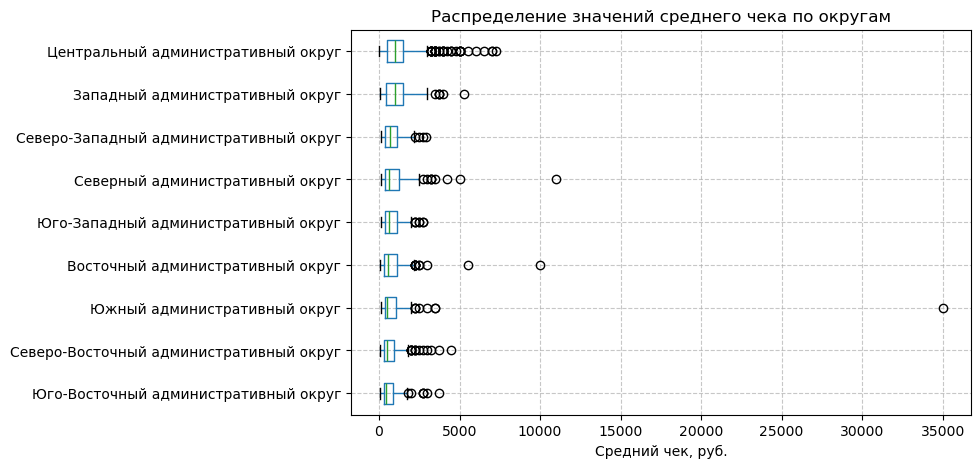

In [47]:
# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(8, 5))

# Отбор данных для диаграммы
gr_dist = df.groupby(['id', 'district'])['middle_avg_bill'].mean().unstack()

# Расчет медианы по каждому столбцу
sort_name = gr_dist.median().sort_values().index

# Сортируем столбцы по медианному значению
gr_dist = gr_dist.loc[:, sort_name]

# Строим диаграмму размаха 
gr_dist.boxplot(vert=False)
    
# Настраиваем оформление графика
plt.title('Распределение значений среднего чека по округам')
plt.xlabel('Cредний чек, руб.')
plt.ylabel('')
plt.grid(linestyle='--', alpha=0.7)

# Выводим график
plt.show()

В Южном, Северном и Восточном административных округах наблюдаются явные выбросы. Посчитаем количество чеков с суммой более 8000 руб. и равному 0 руб.:

In [48]:
print(f'Количество чеков с суммой больше 8000 руб.: {len(df[df['middle_avg_bill'] > 8000])}')

Количество чеков с суммой больше 8000 руб.: 3


In [49]:
print(f'Количество чеков с суммой равной 0 руб.: {len(df[df['middle_avg_bill'] == 0])}')

Количество чеков с суммой равной 0 руб.: 1


Всего четыре чека. Построим диаграмму размаха среднего чека по каждому району без учета этих выбросов:

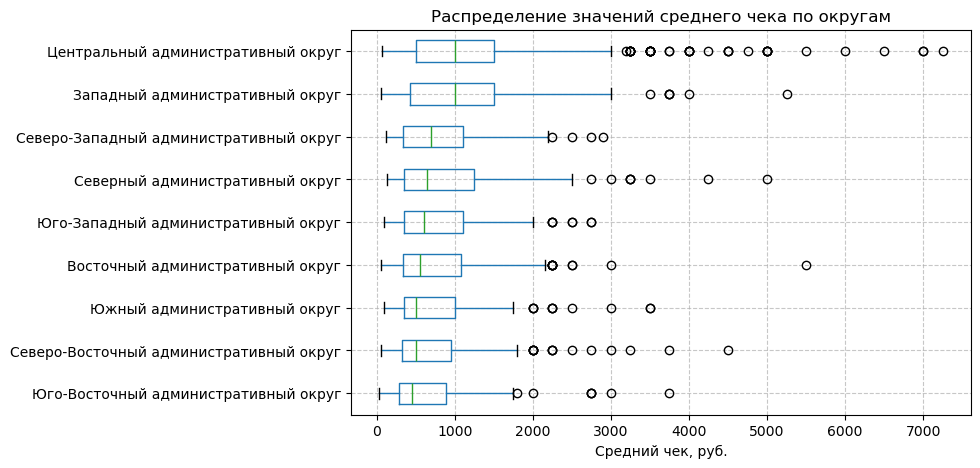

In [50]:
# Исключили выбросы
modif_df = df.query('0<middle_avg_bill<8000')

# Отбор данных для диаграммы
gr_dist = modif_df.groupby(['id', 'district'])['middle_avg_bill'].mean().unstack()

# Расчет медианы по каждому столбцу
sort_name = gr_dist.median().sort_values().index

# Сортируем столбцы по медианному значению
gr_dist = gr_dist.loc[:, sort_name]

# Создаём контейнер графика и задаём его размер
plt.figure(figsize=(8, 5))

# Строим диаграмму размаха 
gr_dist.boxplot(vert=False)
    
# Настраиваем оформление графика
plt.title('Распределение значений среднего чека по округам')
plt.xlabel('Cредний чек, руб.')
plt.ylabel('')
plt.grid(linestyle='--', alpha=0.7)

# Выводим график
plt.show()

Во всех административных округах распределение скошено вправо, в Центральном административном округе оно вытянуто вправо больше остальных. В ЦАО чаще встречаются чеки с суммой от 4000 и выше. 

Сравненим значение среднего и медианного чека по округам по скорректированным данным.

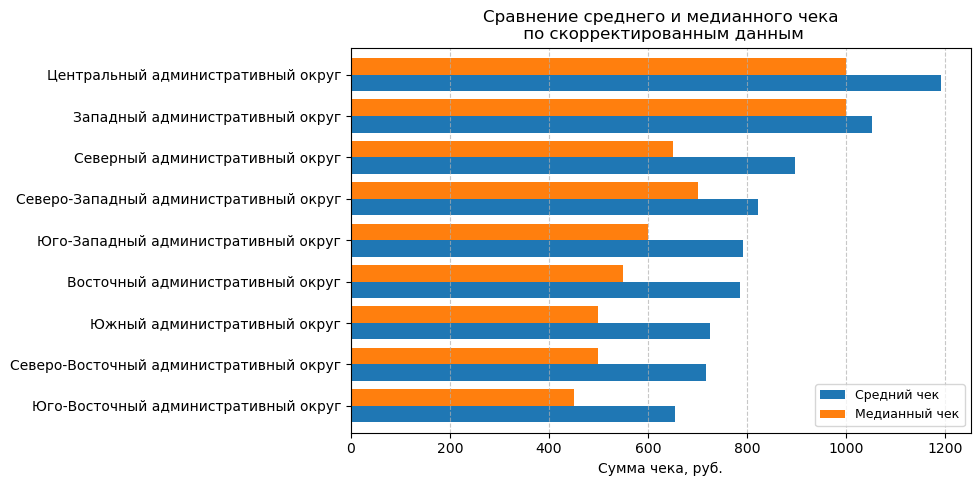

Сравнение среднего и медианного чека по скорректированным данным



,mean,median
district,,
Центральный административный округ,1192.182251,1000.0
Западный административный округ,1053.225464,1000.0
Северный административный округ,896.582581,650.0
Северо-Западный административный округ,822.222900,700.0
Юго-Западный административный округ,792.561707,600.0
Восточный административный округ,785.185303,550.0
Южный административный округ,725.242798,500.0
Северо-Восточный административный округ,716.611267,500.0
Юго-Восточный административный округ,654.097961,450.0


In [51]:
# Отбор данных для диаграммы
receipt = modif_df.groupby('district')['middle_avg_bill'].agg(['mean', 'median']).sort_values('mean')

# Строим столбчатую диаграмму
receipt.plot(kind='barh',
             rot=0,
             figsize=(8, 5), 
             width=0.8,
             title='Сравнение среднего и медианного чека\n по скорректированным данным',
            )

# Настраиваем оформление графика
plt.xlabel('Сумма чека, руб.')
plt.ylabel('')
plt.legend(['Средний чек', 'Медианный чек'], title='', fontsize=9)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Выводим график
plt.show()

print('Сравнение среднего и медианного чека по скорректированным данным\n')
receipt.sort_values(by='mean', ascending=False)

Самые высокие суммы среднего и медианного чеков оказались в Центральном и Западном административных округах, в других округах значительно ниже. Самые низкие - в Юго-Восточном административном округе.

**После проведенного анализа можно сделать следующие выводы:**
- больше всего заведений в категории: кафе, ресторан и кофейня, на них приходится 69.4% от всех представленных заведений;
- Центральный административный округ содержит больше всего заведений - 2242 (26.7% от всех представленных заведений);
- Центральном административном округе больше всего ресторанов - 30% от всех представленных заведений;
- среди всех заведений 62% - несетевые, 38% - сетевые;
- среди сетевых заведений самая большая доля в категории булочные - 61%, среди несетевых в категории бары - 78%;
- наиболее типичное количество посадочных мест в заведении - 75, но встречаются заведения и с количеством мест более 400;
- средний рейтинг для разных категорий заведений изменяется незначительно и варьирует от 4.1 до 4.4;
- со снижением ценовой категории снижается средний рейтинг заведений, однако, изменение незначительное от 4.15 до 4.45;
- в топ-15 заведений по количеству точек, больше всего заведений у "Шоколадница" (кофейня) - 119;
- в топ-15 заведений по количеству точек, больше оказалось кофейн, в этой категории работает 6 брендов;
- cамые высокие средние чеки оказались в Центральном и Западном административных округах - 1192 и 1053 руб. соответсвенно, медианное значение составило 1000 руб. в обоих округах.

---

## 4. Итоговый вывод и рекомендации


В данной работе была проанализирована информация о заведениях общественного питания Москвы, составленная на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. 

**В результате предобработки данных были выполнены следующие действия:**
- Объединили данные двух датасетов в один датафрейм - `df`,  который содержит 13 столбцов и 8406 строк.
- Проанализировали данные на пропуски. Столбцы `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` содержат значительное количество пропусков. Они могут быть связаны с техническим сбоем или с тем, что данную информацию не заполнили, т.к. она была взята из общедоступных источников. В столбце `price` пропуски заменим на - `неизвестно`, в остальных оставили как есть.
- Добавили столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно - значение `True`, в противном случае -`False`.
- Данные проверили на явные и неявные дубликаты. Было удалено 4 строки или 0.05% данных.

**В проделанной работы мы выяснили:** 
- больше всего заведений в категориях кафе - 28% и ресторан 24%, баров всего - 9% от всех;
- наибольшая концентрация заведений в Центральном административном округе - 27% от всех и основную долю в них занимают рестораны - 30%;
- наиболее типичное количество посадочных мест в ресторане - 86, баре - 82, кафе - 60;
- средний рейтинг для разных категорий заведений изменяется незначительно и не сильно зависит от ценовой категории заведения, однако у заведений, относящихся к более дорогой ценовой группе рейтинг как правило выше;
- в топ-15 сетевых заведений по количеству точек на первом месте - "Шоколадница" (кофейня), на втором - "Домино'С пицца" (пиццерия) и на третьем - "Додо пицца" (пиццерия);
- в топ-15 сетевых заведений по количеству точек 6 брендов работают в категории кофейня, по три бренда работают в категориях кафе и ресторан;
- cамые высокие средние чеки оказались в Центральном и Западном административных округах.

**Рекомендации**

Стоит обратить внимание на Западный административный округ, там высокий средний чек, как и в Центральном административном округе и меньше заведений. При выборе из категорий: кафе, ресторан или бар, стоит обратить внимание на то, что наибольшая конкуренция будет в категориях кафе и рестораны они занимают более 50% от всех заведений, в отличии от баров - 9%.  